# STA 141B: Homework 4
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Wei-Kuang 

Last Name: Lin

Student ID: 997062562

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Requesting freshness

In this portion, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

__Exercise 1.1__ (20 pts)

Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [3]:
import numpy as np
import requests
import requests_cache

from urllib.parse import urlparse
import pandas as pd

In [4]:
requests_cache.install_cache('demo_cache')

In [5]:
# my API key: mnRoh2yEr1dhWf9NiBF4Z9KQOGnlu7yHajt78hZc
# API_Key = "mnRoh2yEr1dhWf9NiBF4Z9KQOGnlu7yHajt78hZc"

In [6]:
def ndb_search(term):
    '''
    Action: A function called ndb_search() that makes a search request based on the term
    Arguemnt: this function accept the search term as an argument
    Return: it returns the search result items as a list (for 0 items, return an empty list)
    '''
    
    API_Key = "mnRoh2yEr1dhWf9NiBF4Z9KQOGnlu7yHajt78hZc"

    if term == 0 :
        response = []
        return response
    
    elif term == None:
        response = []
        return response
    
    else:
        response = requests.get( "https://api.nal.usda.gov/ndb/search", params = {
            "api_key": API_Key,
            "q": term,
            "format": "json"})
        return response.json()['list']['item']

In [7]:
# Fuction test: it's correct 
ndb_search("quail eggs")

[{'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'offset': 0},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': "D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  'ndbno': '45178254',
  'offset': 1},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'offset': 2},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'offset': 3},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'offset': 4},
 {'ds': 'SR',
  'group': 'Dairy and Egg Products',
  'name': 'Egg, quail, whole, fresh, raw',
  'ndbno': '01140',
  'offset': 5}]

In [8]:
# test if 0 items, the function returns an empty list
test1 = ndb_search(0)
test1 == []

True

In [9]:
# test if items is empty, the function returns an empty list
test2 = ndb_search(None)
test2 == []

True

__Exercise 1.2__ (20 pts)

Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

__ANS :__ My strategy is to extract the "food" column provided by the fresh.csv file. Create a for loop based on the food name in the food column, and ndb_search() will serach the ndb number through search url https://api.nal.usda.gov/ndb/search. Also, to avoid the unacceptable string structure (ex "_" in the food name), I use str.replace() to form acceptable search term. 

In [10]:
# Read the food name in the csv file
path= ("C:/Users/WeiKuang/Documents/GitHub/sta141b-hw4-Wei-Kuang/fresh.csv")
fresh_df = pd.read_csv(path)

# Extract the "food column" from fresh.csv. It will be used for "for loop"
food_list= list(fresh_df['food'])

In [11]:
# Creat an empty dataframe for "for loop"
DF_ndbno = pd.DataFrame(pd.np.empty((0, 6))) # create a empty dataframe with 5 cols
DF_ndbno.columns = ['food','ds','group','name', 'ndbno','offset']
DF_ndbno

,food,ds,group,name,ndbno,offset


In [12]:
# for loop
for FoodName in food_list:
    FoodName_c = str(FoodName).replace("_", " ") 
    QList = ndb_search(FoodName_c)
    
    # convert into dataframe
    df = pd.DataFrame(QList)
    
    # Select unbranded (ex: select the row where "SR" is in the ds columns)
    is_SR = df.iloc[:,0].str.contains("SR").fillna(False)
    df=df.loc[is_SR,:]
    
    # Select raw in name column
    is_RAW = df.iloc[:,2].str.contains(", raw").fillna(False)
    df=df.loc[is_RAW,:]
    
    #insert the food name in "food column"
    df.insert(0,'food',FoodName)
    
    # Append the data
    DF_ndbno = DF_ndbno.append(df) 

In [13]:
# Reuslt of the loop
DF_ndbno

,food,ds,group,name,ndbno,offset
4,watermelon,SR,Fruits and Fruit Juices,"Watermelon, raw",09326,4.0
0,cantaloupe,SR,Fruits and Fruit Juices,"Melons, cantaloupe, raw",09181,0.0
7,tangerines,SR,Fruits and Fruit Juices,"Tangerines, (mandarin oranges), raw",09218,7.0
8,tangerines,SR,Fruits and Fruit Juices,"Tangerine juice, raw",09221,8.0
89,strawberries,SR,Fruits and Fruit Juices,"Strawberries, raw",09316,89.0
94,strawberries,SR,Fruits and Fruit Juices,"Guavas, strawberry, raw",09140,94.0
4,plums,SR,Fruits and Fruit Juices,"Plums, raw",09279,4.0
6,plums,SR,Fruits and Fruit Juices,"Carissa, (natal-plum), raw",09061,6.0
7,plums,SR,Fruits and Fruit Juices,"Java-plum, (jambolan), raw",09145,7.0
129,oranges,SR,Fruits and Fruit Juices,"Oranges, raw, California, valencias",09201,129.0


In [14]:
# Remove the duplication of the food
# Reference: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html
DF_no = DF_ndbno.copy()

DF_no = DF_no.drop_duplicates(subset='food', keep='first', inplace=False)

# Remove the irrelevent columns
DF_no = DF_no.drop(['group', 'name', 'offset'], axis=1)

DF_no

,food,ds,ndbno
4,watermelon,SR,09326
0,cantaloupe,SR,09181
7,tangerines,SR,09218
89,strawberries,SR,09316
4,plums,SR,09279
129,oranges,SR,09201
48,raspberries,SR,09302
11,pomegranate,SR,09286
117,pineapple,SR,09266
15,apricots,SR,09021


In [15]:
# Merge: to form a dataframe that has price and NDB nu,ber
DF_pn_1 = fresh_df.merge(DF_no, left_on='food', right_on='food', how='outer')

DF_pn_1

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ds,ndbno
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit,SR,09326
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit,SR,09181
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit,SR,09218
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit,SR,09316
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit,SR,09279
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit,SR,09201
6,Fresh1,6.975811,0.960000,0.319670,2.322874,raspberries,fruit,SR,09302
7,Fresh1,2.173590,0.560000,0.341717,1.326342,pomegranate,fruit,SR,09286
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit,SR,09266
9,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit,SR,09021


#### The final result of Exercise 1.2

In [16]:
# The result of Exercise 1.2

# remove NaN
DF_pn_2 = DF_pn_1.copy()
DF_pn_2 = DF_pn_2.dropna(axis=0, how='any')

# remove duplicated ndbno
DF_pn_2= DF_pn_2.drop_duplicates(subset='ndbno', keep='first', inplace=False)

DF_pn_2

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ds,ndbno
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit,SR,09326
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit,SR,09181
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit,SR,09218
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit,SR,09316
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit,SR,09279
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit,SR,09201
6,Fresh1,6.975811,0.960000,0.319670,2.322874,raspberries,fruit,SR,09302
7,Fresh1,2.173590,0.560000,0.341717,1.326342,pomegranate,fruit,SR,09286
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit,SR,09266
9,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit,SR,09021


__Exercise 1.3__ (20 pts)

Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [17]:
def food_report(NDB):
    '''
    Action: A function that makes a search request based on the NDB number
    Arguemnt: this function accept "NDB" number as an argument
    Return: it returns the list of nutrients for the food.
    '''
    if NDB == 0 :
        response = []
        return response
    
    elif NDB == None:
        response = []
        return response
    
    else:
        response = requests.get( "https://api.nal.usda.gov/ndb/V2/reports", params = {
            "api_key": "mnRoh2yEr1dhWf9NiBF4Z9KQOGnlu7yHajt78hZc",
            "ndbno": NDB,
            "type": "b",       # Report type: [b]asic or [f]ull or [s]tats
            "format": "json"})
        return response.json()['foods'][0]['food']['nutrients']

# Note: use type() to test whether the returned object is a dict or list

In [18]:
# Test: the first element of the returned list, with NDB = "09279" (raw plums) 
food_report("09279")[0] # Correct!

{'derivation': 'NONE',
 'group': 'Proximates',
 'measures': [{'eqv': 165.0,
   'eunit': 'g',
   'label': 'cup, sliced',
   'qty': 1.0,
   'value': '143.93'},
  {'eqv': 66.0,
   'eunit': 'g',
   'label': 'fruit (2-1/8" dia)',
   'qty': 1.0,
   'value': '57.57'},
  {'eqv': 151.0,
   'eunit': 'g',
   'label': 'NLEA serving',
   'qty': 1.0,
   'value': '131.72'}],
 'name': 'Water',
 'nutrient_id': '255',
 'unit': 'g',
 'value': '87.23'}

__Exercise 1.4__ (20 pts) Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

#### 1.4 - 1 Form a temporary dataframe that has ndb number and nutrients of my interest

In [19]:
# Creat an empty dataframe for "for loop"
DF_ndb_nutri = pd.DataFrame(pd.np.empty((0, 9))) # create a empty dataframe with 5 cols
DF_ndb_nutri.columns = ['ndbno','Energy', 'Fiber', 'Ca', 'Fe', 'Mg', 'Vitamin C','Vitamin B-6','Vitamin E']
DF_ndb_nutri

,ndbno,Energy,Fiber,Ca,Fe,Mg,Vitamin C,Vitamin B-6,Vitamin E


In [20]:
for n in DF_pn_2.ndbno:
    
    # convert the returned list of to dataframe
    df1 = pd.DataFrame( food_report( n ) )
    # If the list of nutrient is not complete, move to the next food 
    if len(df1.iloc[:,0]) !=33:
        next
    
    else:
        # Drop the uesless columns
        df2 = df1.drop(['group','derivation', 'measures'], axis=1)
        # Select nutrients of my interest
        L = [1,5,7,8,9,14,18,23] # be awared of positional indexers are out-of-bounds
        df_s = df2.iloc[ L,:]
        # transpose
        df_s_T = df_s.transpose()
        # n_df_s_T.columns = [list(n_df_s_T.iloc[0])] # rename the col
        df_s_T.columns = ['Energy', 'Fiber', 'Ca', 'Fe', 'Mg', 'Vitamin C','Vitamin B-6', 'Vitamin E'] 
        # select the row of value
        df_s_T = df_s_T.iloc[[3]]
        # Add the ndb number
        df_s_T.insert(0,"ndbno", n)
        # Append
        DF_ndb_nutri = DF_ndb_nutri.append(df_s_T)

In [21]:
DF_ndb_nutri.head()

,ndbno,Energy,Fiber,Ca,Fe,Mg,Vitamin C,Vitamin B-6,Vitamin E
value,09326,30,0.4,7,0.24,10,8.1,0.045,0.05
value,09181,34,0.9,9,0.21,12,36.7,0.072,0.05
value,09218,53,1.8,37,0.15,12,26.7,0.078,0.20
value,09316,32,2.0,16,0.41,13,58.8,0.047,0.29
value,09279,46,1.4,6,0.17,7,9.5,0.029,0.26


In [25]:
# Merge 
DF14 = DF_pn_2.merge(DF_ndb_nutri, left_on='ndbno', right_on='ndbno', how='inner')

In [26]:
DF14.head(3)

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ds,ndbno,Energy,Fiber,Ca,Fe,Mg,Vitamin C,Vitamin B-6,Vitamin E
0,Fresh1,0.333412,0.52,0.330693,0.212033,watermelon,fruit,SR,09326,30,0.4,7,0.24,10,8.1,0.045,0.05
1,Fresh1,0.535874,0.51,0.374786,0.393800,cantaloupe,fruit,SR,09181,34,0.9,9,0.21,12,36.7,0.072,0.05
2,Fresh1,1.377962,0.74,0.407855,0.759471,tangerines,fruit,SR,09218,53,1.8,37,0.15,12,26.7,0.078,0.20


In [27]:
DF14 = DF14.drop(['form','lb_per_cup', 'price_per_cup', 'type', 'ds'], axis=1)
DF14.head()

,price_per_lb,yield,food,ndbno,Energy,Fiber,Ca,Fe,Mg,Vitamin C,Vitamin B-6,Vitamin E
0,0.333412,0.52,watermelon,09326,30,0.4,7,0.24,10,8.1,0.045,0.05
1,0.535874,0.51,cantaloupe,09181,34,0.9,9,0.21,12,36.7,0.072,0.05
2,1.377962,0.74,tangerines,09218,53,1.8,37,0.15,12,26.7,0.078,0.20
3,2.358808,0.94,strawberries,09316,32,2.0,16,0.41,13,58.8,0.047,0.29
4,1.827416,0.94,plums,09279,46,1.4,6,0.17,7,9.5,0.029,0.26


#### 1.4 - 2 Analysis
The best value is what we could spend the one dollar to gain the most weight from the edible part of food. I create a colunm called "edible_pound per_1_dollar" to reflect this idea. The formula of "edible_pound_per_1_dollar" is [ yield /  price per pound ], and the larger value, the better. 




In [28]:
edible_pound_per_1_dollar = DF14.iloc[:,1] / DF14.iloc[:,0] 

In [30]:
DF14.insert(2, "edible_pount_per_1_dollar",edible_pound_per_1_dollar)

In [31]:
DF14.head()

,price_per_lb,yield,edible_pount_per_1_dollar,food,ndbno,Energy,Fiber,Ca,Fe,Mg,Vitamin C,Vitamin B-6,Vitamin E
0,0.333412,0.52,1.559632,watermelon,09326,30,0.4,7,0.24,10,8.1,0.045,0.05
1,0.535874,0.51,0.951717,cantaloupe,09181,34,0.9,9,0.21,12,36.7,0.072,0.05
2,1.377962,0.74,0.537025,tangerines,09218,53,1.8,37,0.15,12,26.7,0.078,0.20
3,2.358808,0.94,0.398506,strawberries,09316,32,2.0,16,0.41,13,58.8,0.047,0.29
4,1.827416,0.94,0.514388,plums,09279,46,1.4,6,0.17,7,9.5,0.029,0.26


In [32]:
# Calculate the rank by each columns
R_edible_per_dollar = DF14['edible_pount_per_1_dollar'].rank(axis=0, method='average')
R_Energy = DF14['Energy'].rank(axis=0, method='average')
R_Fiber = DF14['Fiber'].rank(axis=0, method='average')
R_Fe = DF14['Fe'].rank(axis=0, method='average')
R_VC= DF14['Vitamin C'].rank(axis=0, method='average')
R_VB = DF14['Vitamin B-6'].rank(axis=0, method='average')

In [33]:
# Creat a dataframe that refleck the ranking in each nutrient
d = {'Edible_per_dollar rank' : R_edible_per_dollar,
     'Energy rank' : R_Energy,
     'Fiber rank': R_Fiber,
     'Fe rank': R_Fe,
     'Vitamin C rank': R_VC,
     'Vitamin B-6 rank': R_VB,
     'food' : DF14['food']}


Rank = pd.DataFrame(d)
Rank['Best_Combination'] = Rank.sum(axis=1)
Rank

,Edible_per_dollar rank,Energy rank,Fe rank,Fiber rank,Vitamin B-6 rank,Vitamin C rank,food,Best_Combination
0,34.0,8.0,9.0,1.0,11.0,29.0,watermelon,92.0
1,31.0,12.0,7.5,4.0,18.0,16.0,cantaloupe,88.5
2,20.0,27.0,2.0,17.0,20.0,14.0,tangerines,100.0
3,14.0,9.5,23.5,18.5,12.0,22.0,strawberries,99.5
4,17.0,20.0,4.5,7.5,3.5,33.0,plums,85.5
5,1.0,25.5,28.0,34.0,15.5,13.0,raspberries,117.0
6,8.0,32.0,17.0,32.0,19.0,3.0,pomegranate,111.0
7,29.0,23.5,16.0,7.5,24.0,19.0,pineapple,119.0
8,10.0,21.0,21.0,18.5,14.0,1.5,apricots,86.0
9,22.0,13.0,4.5,3.0,21.0,6.5,honeydew,70.0


#### 1.4 - 3 Plotting

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [35]:
# Sortting 
Rank = Rank.sort_values(by=['Best_Combination'],ascending=False) # sort the dataframe by "___"

C:\Users\WeiKuang\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


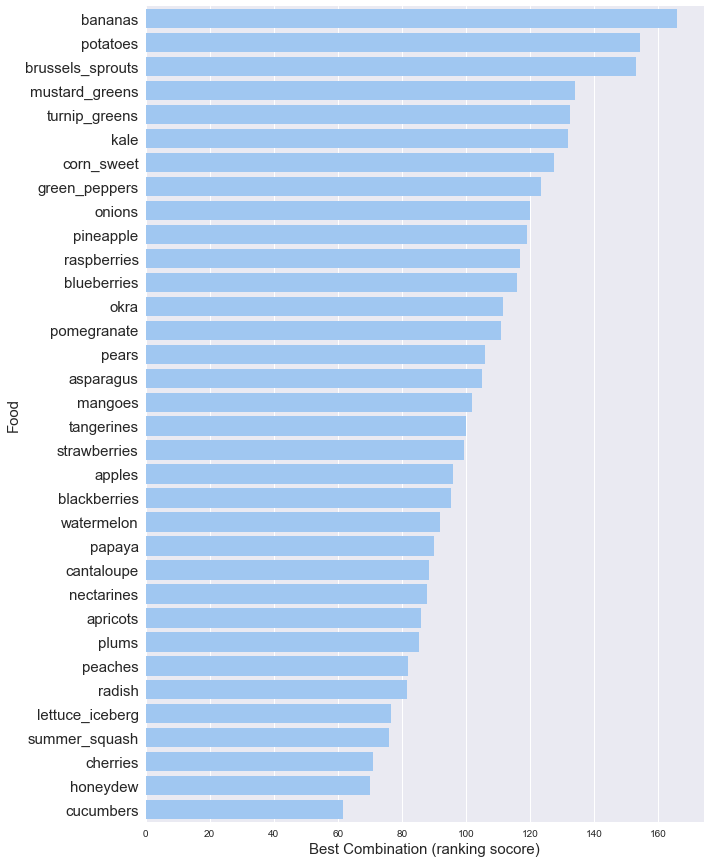

In [37]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

# Plotting
sns.set_color_codes("pastel")
sns.barplot(x='Best_Combination', y='food', data= Rank, color="b")

plt.xlabel("Best Combination (ranking socore)", fontsize=15)
plt.ylabel("Food", fontsize=15)
plt.yticks(fontsize=15)

plt.show()

#### 1.4 - 3 Plotting 2

ValueError: Colormap YuGn_r is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [152]:
list( np.arange(0,40,5) )

[0, 5, 10, 15, 20, 25, 30, 35]

C:\Users\WeiKuang\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


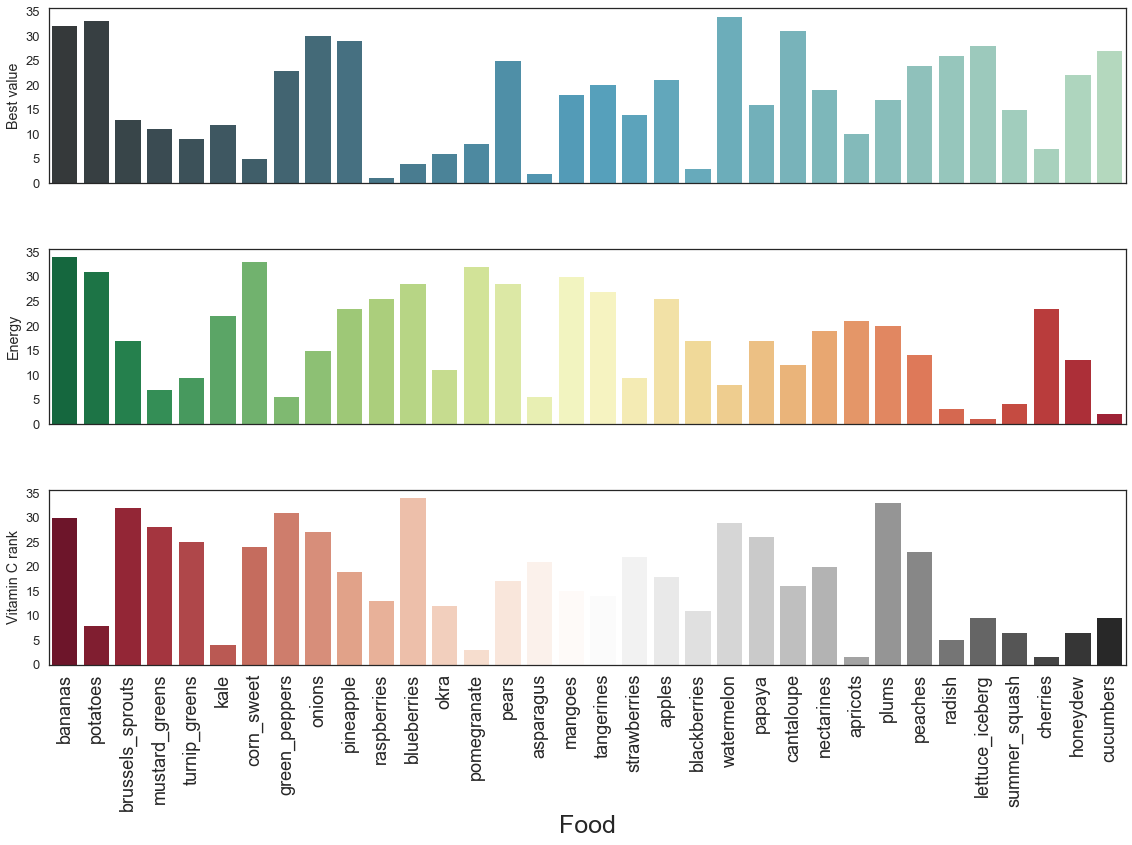

In [169]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
rs = np.random.RandomState(7)


# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 12), sharex=True)  # 3 row, 1 col


#Best value
sns.barplot( x='food' , y='Edible_per_dollar rank', data = Rank, palette="GnBu_d", ax=ax1)
ax1.set_ylabel("Best value")
ax1.set_xlabel(" ")

# Energy
sns.barplot( x='food' , y='Energy rank', data = Rank, palette="RdYlGn_r", ax=ax2)
ax2.set_ylabel("Energy")
ax2.set_xlabel(" ")


# Vitamin C rank
sns.barplot( x='food' , y='Vitamin C rank', data = Rank, palette="RdGy", ax=ax3)
ax3.set_ylabel("Vitamin C rank")



# Finalize the plot

#sns.despine(bottom=True)
plt.xlabel("Food", fontsize=25)
plt.xticks(rotation=90, fontsize=18)

plt.setp(f.axes, yticks= list( np.arange(0,40,5) ) )

plt.tight_layout(h_pad=3)

plt.show()


C:\Users\WeiKuang\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


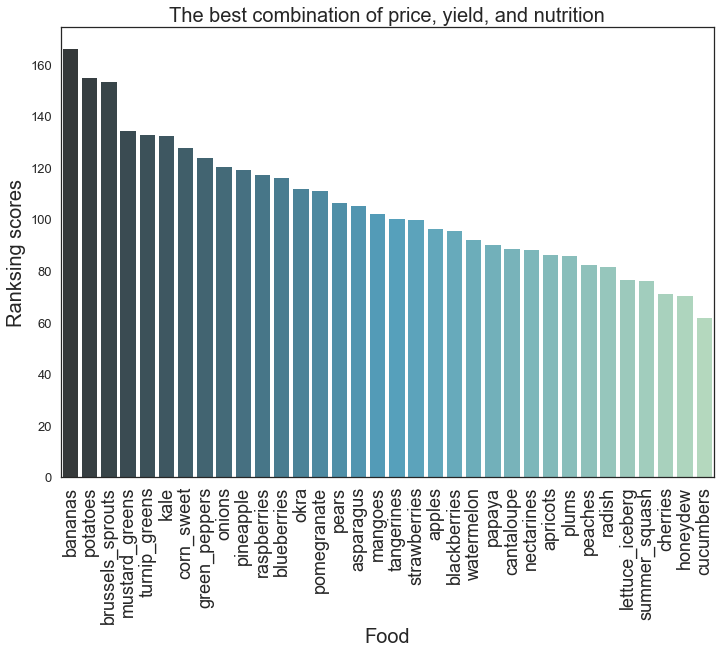

In [105]:
#sns.barplot( Rank.loc[:,'food'] , Rank.loc[:,'Best_Combination'], palette="GnBu_d")
sns.barplot( x='food' , y='Best_Combination', data = Rank, palette="GnBu_d")

plt.title('The best combination of price, yield, and nutrition',fontsize=20 )
plt.xlabel("Food", fontsize=20)
plt.ylabel("Ranksing scores", fontsize=20)
plt.xticks(rotation=90, fontsize=18)

plt.show()

#### 1.4 Result

In addition to the best value (price and yield) and energy (providing the energy source),I also consider the following nutrtients that play importnat role in metabolism.

1. Fe is the important element for Hemoglobin.

2. Fiber is associated with reduced diabetes risk.

3. Vitamin C Vitamin C is an essential nutrient involved in the repair of tissue and the enzymatic production of certain neurotransmitters.

4. Vitamin B6 servess as a coenzyme in some 100 enzyme reactions in amino acid, glucose, and lipid metabolism.

I rank the best value and each nutrition by food. Each food has a sum of ranking scores, determning the best combination of price, yield, and nutrition. The result shows that banana is the best food that provide best value, and the most amount of targeted nutrition.